# Decision tree, KNN, and RandomForest demo

In [1]:
import numpy as np
import numpy.random as npr

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from plot_classifier import plot_classifier

import matplotlib.pyplot as plt
%matplotlib inline

%precision %.2f

/Users/mgelbart/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


'%.2f'

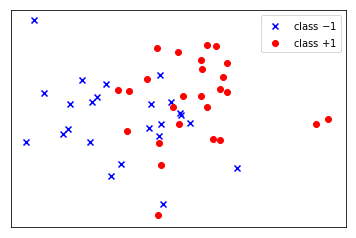

In [2]:
# make up some fake data

N = 50
X = npr.randn(N,2)
y = npr.choice((-1,+1),size=N)
X[y>0,0] += 1
X[y>0,1] += 1

plt.scatter(X[y<0,0], X[y<0,1], color="b", marker="x", label="class $-1$")
plt.scatter(X[y>0,0], X[y>0,1], color="r", marker="o",  label="class $+1$")
plt.tick_params(axis='both', which='both', bottom=False, left=False, labelbottom=False, labelleft=False) # remove ticks
plt.legend(loc="best");

## Decision trees

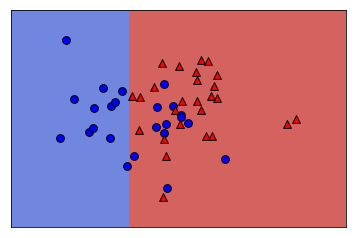

In [3]:
dt = DecisionTreeClassifier(max_depth=1)
dt.fit(X,y)
plot_classifier(X, y, dt)

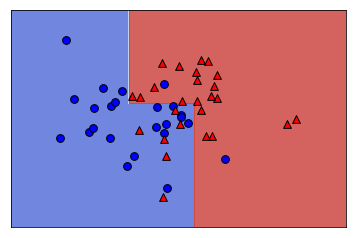

In [4]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X,y)
plot_classifier(X, y, dt)

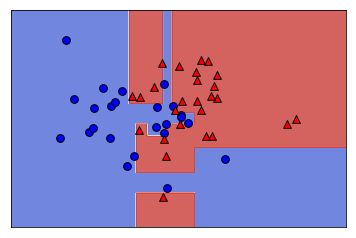

In [5]:
dt = DecisionTreeClassifier()
dt.fit(X,y)
plot_classifier(X, y, dt)


## KNN

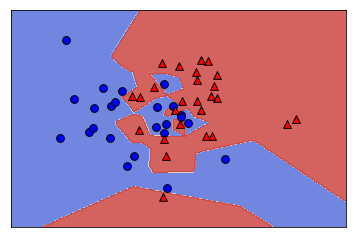

In [6]:
nn = KNeighborsClassifier(n_neighbors=1)
nn.fit(X,y)
plot_classifier(X, y, nn)

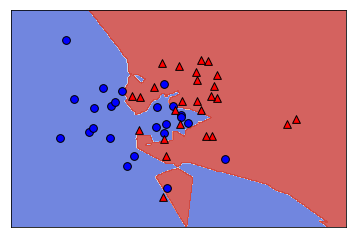

In [7]:
nn = KNeighborsClassifier(n_neighbors=3)
nn.fit(X,y)
plot_classifier(X, y, nn)

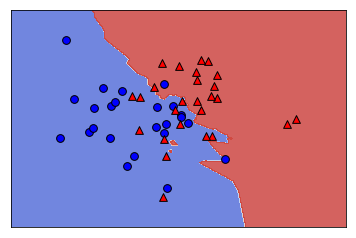

In [8]:
nn = KNeighborsClassifier(n_neighbors=10)
nn.fit(X,y)
plot_classifier(X, y, nn)

## Random Forests

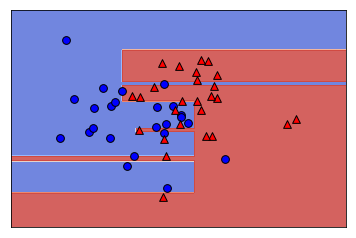

In [9]:
rf = RandomForestClassifier(n_estimators=1)
rf.fit(X,y)
plot_classifier(X, y, rf)

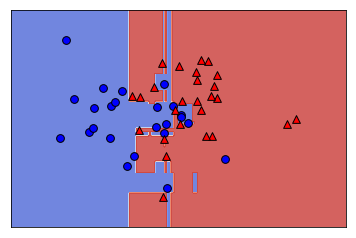

In [10]:
rf = RandomForestClassifier(n_estimators=5)
rf.fit(X,y)
plot_classifier(X, y, rf)

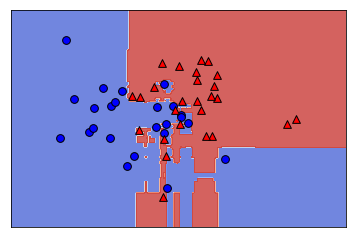

In [11]:
rf = RandomForestClassifier(n_estimators=50)
rf.fit(X,y)
plot_classifier(X, y, rf)

### Averaging KNN, Decision Tree, Random Forest

- The next cell will be slow the first time you run it, as it needs to download the data set (internet connection needed).


In [12]:
import sklearn.datasets

# load the newsgroups data
train = sklearn.datasets.fetch_20newsgroups_vectorized(subset='train')
X_train = train.data
y_train = train.target

test = sklearn.datasets.fetch_20newsgroups_vectorized(subset='test')
X_test = test.data
y_test = test.target

In [13]:
print("n =", X_train.shape[0])
print("d =", X_train.shape[1])
print("t =", X_test.shape[0])
num_classes = len(np.unique(y_train))
print("number of classes =", num_classes)

n = 11314
d = 130107
t = 7532
number of classes = 20


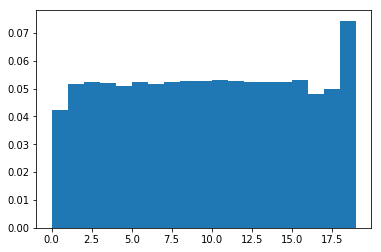

In [14]:
# check the uniformity of the training labels
plt.hist(y_train, density=True, bins=np.unique(y_train));

Ok, they aren't perfectly uniform but the situation isn't too bad either.

In [15]:
def print_errs(model):
    train_err = 1-model.score(X_train, y_train)
    test_err  = 1-model.score(X_test,  y_test)

    print("Train error:", train_err)
    print("Test  error:", test_err)

In [16]:
%%timeit -n1 -r1

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

print_errs(dt)

Train error: 8.838607035532853e-05
Test  error: 0.4403876792352629
33.9 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [17]:
%%timeit -n1 -r1

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

print_errs(rf)

Train error: 0.001502563196040252
Test  error: 0.4419808815719597
8.57 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


Above: ironically, the random forest trains faster than the decision tree, presumably because it's only considering $\sqrt{d}$ features per split and $d$ is very large here.

In [18]:
%%timeit -n1 -r1

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

print_errs(knn)

Train error: 0.20867951210889168
Test  error: 0.5916091343600638
38 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [19]:
# run this cell again because Jupyter is buggy :(
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

print_errs(knn)

Train error: 0.20867951210889168
Test  error: 0.5916091343600638


In [20]:
from sklearn.ensemble import VotingClassifier

classifiers = {
    "decision tree" : dt,
    "random forest" : rf,
    "KNN"           : knn
}

ensemble = VotingClassifier(classifiers.items())
ensemble.fit(X_train, y_train)

print_errs(ensemble)

/Users/mgelbart/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Train error: 8.838607035532853e-05
Test  error: 0.3349707912904939


/Users/mgelbart/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Overall the results here aren't that amazing. And yet it's cool that the ensemble is better than all 3 individual classifiers.

## (bonus) XGBoost

- This requires some extra installation: `conda install py-xgboost` worked for me.
- This code takes several minutes to run (for me at least).
- The following code cell is a hack to make XGBoost work on macOS, see https://github.com/dmlc/xgboost/issues/1715

In [21]:
# import os
# os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [22]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=10, max_depth=10, learning_rate=1, objective='multi:softmax')

In [23]:
%%timeit -n1 -r1

xgb.fit(X_train, y_train)

3min 16s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [24]:
print_errs(xgb)

/Users/mgelbart/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Train error: 0.0003535442814212031
Test  error: 0.3283324482209241


/Users/mgelbart/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


This uses boosting with decision trees -- a specific form of boosting called [gradient boosting](https://en.wikipedia.org/wiki/Gradient_boosting). XGBoost tends to do very well on a lot of tasks.